In [1]:
using Revise
using Underscore
using Particles, Distributions, ConjugatePriors, DataFrames, DataFramesMeta, JLD2
using Gadfly

In [2]:
Revise.track("VOTs.jl")
Revise.track("Experiments.jl")

In [3]:
using Experiments, VOTs

# Run 1

In [4]:
@load "results/run1-2018-01-27T23:24:32.675.jld2" exs results

2-element Array{Symbol,1}:
 :exs    
 :results

In [5]:
ers = flatten(exs, results, :num_obs)

3600-element Array{Any,1}:
 (Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.01),Pair{Symbol,Any}(:num_particle, 10),Pair{Symbol,Any}(:ν_0, 2.0),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:num_obs, 10),Pair{Symbol,Any}(:data, [8.7906, 38.2032, 34.4798, 7.55092, 33.7626, 10.5768, 66.9819, 16.3505, 13.8196, 35.2445  …  87.9546, 70.0699, 113.279, 2.77704, 9.23872, 80.3282, -2.28151, 88.8638, 1.81956, 15.1191])), 0x38c8322558b69af0), Experiments.Result(1, 1.0, 1, [1.0]))                                                                                                                                                                                             
 (Experiments.Experiment(Dict{Symbol,Any}(Pair{Symbol,Any}(:α, 0.01),Pair{Symbol,Any}(:num_particle, 10),Pair{Symbol,Any}(:ν_0, 2.0),Pair{Symbol,Any}(:κ_0, 0.05),Pair{Symbol,Any}(:μ_0, 31.4579),Pair{Symbol,Any}(:σ2_0, 694.493),Pair{Symbol,Any}(:num_obs, 10

In [8]:
run1_summary = results_summary(ers)

,num_particle,num_obs,α,low,success,high,avg_K_map,avg_K_mean,avg_p_K2
1,10,10,0.01,1.0,0.0,0.0,1.0,1.0173,0.0173016
2,10,100,0.01,0.91,0.09,0.0,1.09,1.1221,0.122101
3,10,1000,0.01,0.83,0.17,0.0,1.17,1.20212,0.200103
4,10,10,0.1,1.0,0.0,0.0,1.0,1.13783,0.129281
5,10,100,0.1,0.67,0.32,0.01,1.34,1.59692,0.491782
6,10,1000,0.1,0.21,0.63,0.16,1.96,2.04962,0.661092
7,10,10,1.0,0.85,0.13,0.02,1.17,1.96975,0.433864
8,10,100,1.0,0.07,0.34,0.59,2.74,3.26468,0.23617
9,10,1000,1.0,0.0,0.08,0.92,3.93,4.12045,0.0646308
10,10,10,10.0,0.01,0.09,0.9,4.58,5.02005,0.0283246


## Success by α and number of observations

"Success" is defined by the MAP particle having exactly 2 components.  Success is best for low alpha and more particles.  Interestingly, with very low alpha (0.01), you get to the same rate of success after 1,000 observations as with low (0.1)



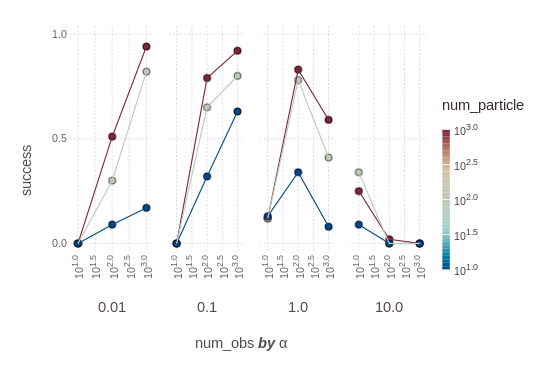

In [10]:
plot(run1_summary, x=:num_obs, y=:success, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_log10)

For alpha = 1.0, success rises but then falls as the model imputes more clusters:

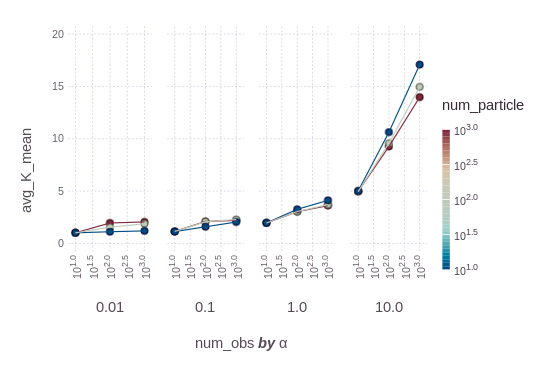

In [15]:
plot(run1_summary, x=:num_obs, y=:avg_K_mean, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_log10)

## Probability assigned to $K=2$

Another measure of success is how much posterior probability the model assigns to solutions with exactly two clusters.

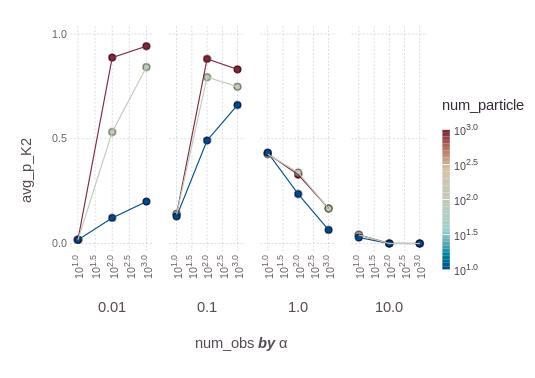

In [16]:
plot(run1_summary, x=:num_obs, y=:avg_p_K2, color=:num_particle, xgroup=:α,
     Geom.subplot_grid(Geom.line, Geom.point), Scale.x_log10, Scale.color_log10)